# Tutorial on Quantum Programming: An Introduction

### Earlier: <br/>1/3 Motivation: Why Quantum Computing?
### Now: <br/>2/3 Elements of Quantum Programming
### Later today: <br/> 3/3 Solving Problems with Quantum Programs

### `Abraham Asfaw`, IBM Quantum <br/> twitter: `@abe_asfaw`<br/> github: `@aasfaw`
<center><img src='./ieeeqw2020-abe-asfaw-talk-dependencies/images/gitimage.png'></center>

# Problem: How would you find the marked number in this box?

<br/>
<center><img src='./ieeeqw2020-abe-asfaw-talk-dependencies/images/box.png'></center>

# Problem: How would you find the marked number in this box?

<br/>
<center><img src='./ieeeqw2020-abe-asfaw-talk-dependencies/images/quantumvsclassical.png'></center>

### Quantum programming allows us to reduce the worst-case number of attempts from exactly the size of the problem to ~square-root of the size of the problem.

# Elements of Quantum Programming

In [1]:
import numpy as np
import matplotlib.pyplot as plotter

import sys
sys.path.append("ieeeqw2020-abe-asfaw-talk-dependencies/")

import warnings
warnings.filterwarnings('ignore')

In [2]:
from marked_number_boxes import quantum_box, find_number_in_quantum_box

max_number = 8
my_box = quantum_box(max_number, print_self = True)

This is a quantum box containing the marked number 7.


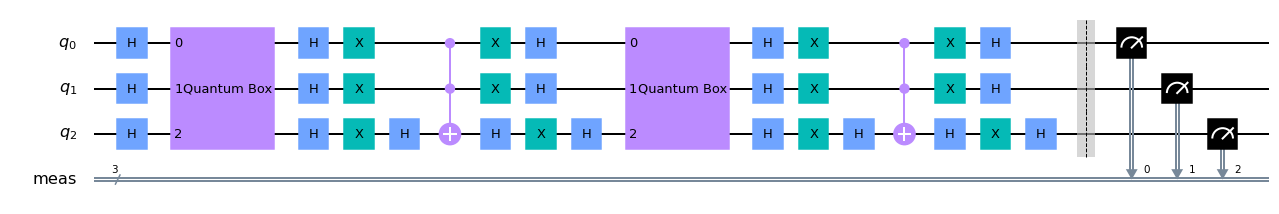

In [3]:
quantum_program = find_number_in_quantum_box(my_box)
quantum_program.draw()

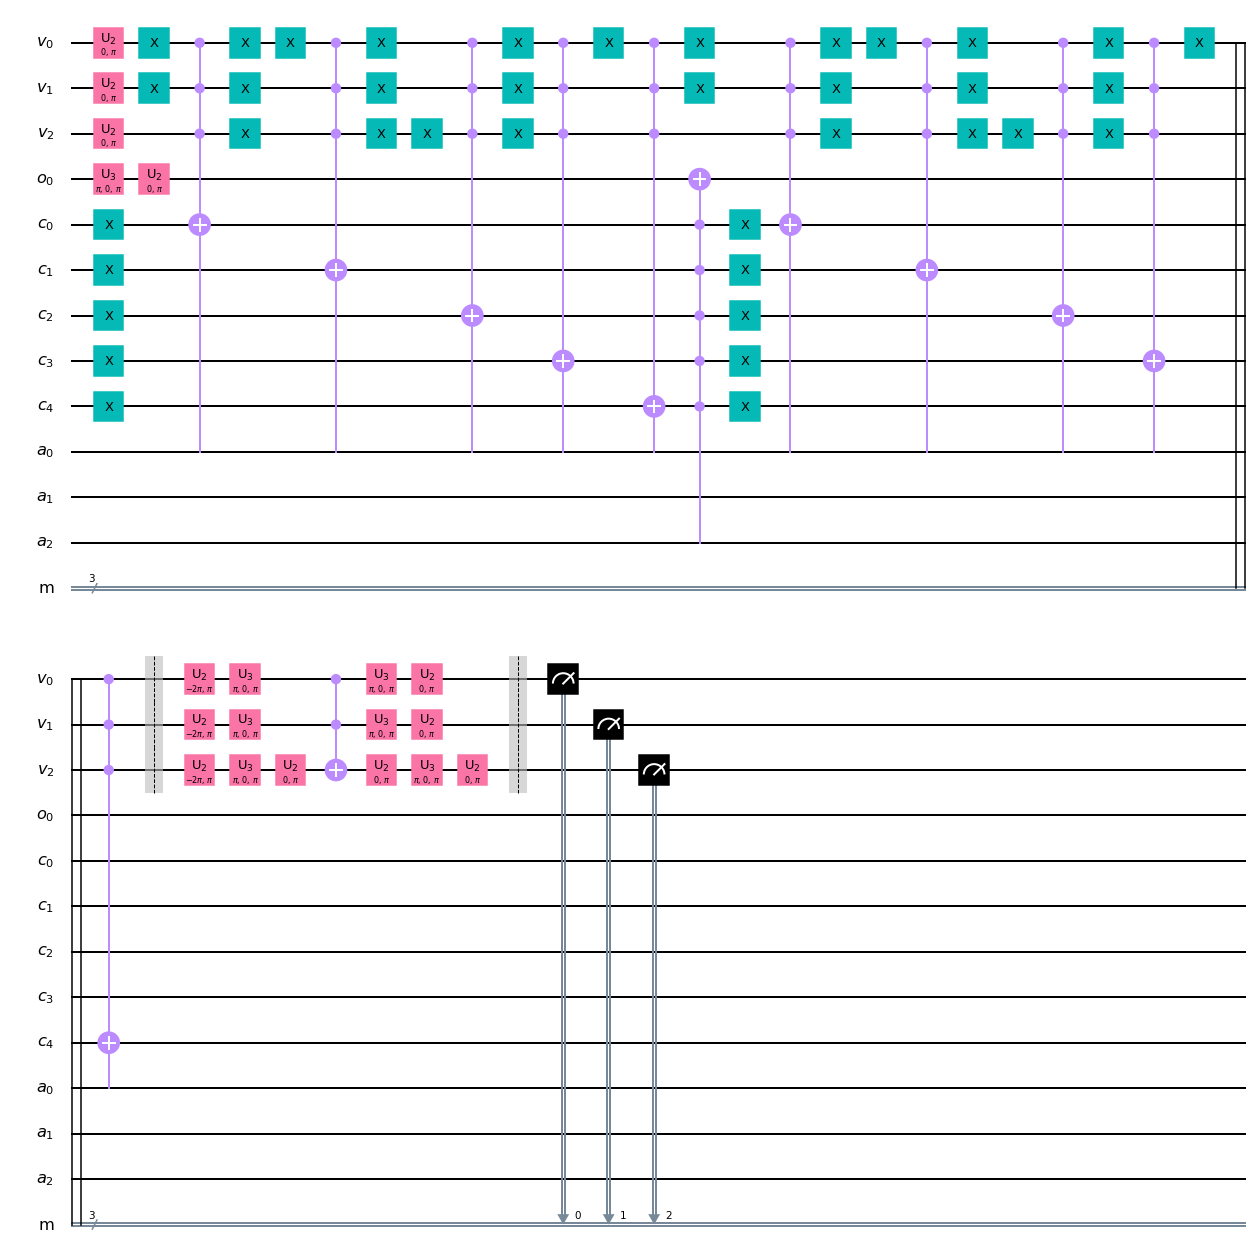

In [4]:
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle

input_constraints = \
'''
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

oracle = LogicalExpressionOracle(input_constraints)
grover = Grover(oracle)
grover.construct_circuit(measurement=True).draw()

Each gate in the circuits above is, in itself, translated to microwave pulses that control and manipulate the quantum states on the physical qubits. 

https://www.ibm.com/events/activations-quantum

# Key concepts

1. The ability to create `superpositions` and `interfere` them
2. The ability to `entangle` multiple qubits

# 1. The ability to create `superpositions` and `interfere` them

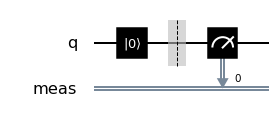

In [5]:
from qiskit import QuantumCircuit

number_of_qubits = 1
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.measure_all()

my_circuit.draw()

{'0': 10000}


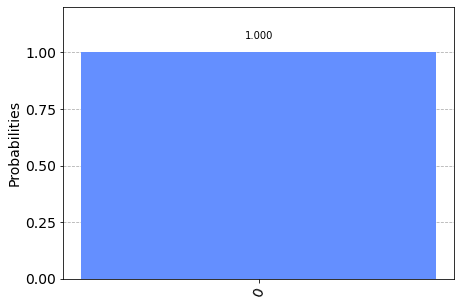

In [6]:
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

from qiskit.visualization import plot_histogram
print(counts)
plot_histogram(counts)

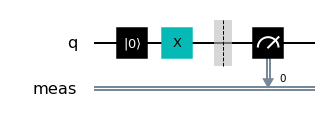

{'1': 10000}


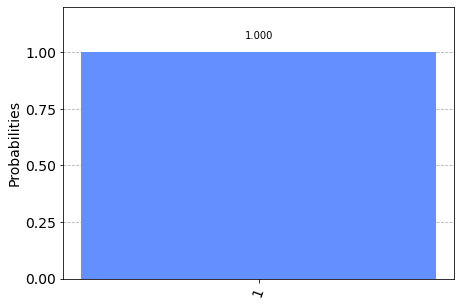

In [7]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.x(0)
my_circuit.measure_all()

display(my_circuit.draw())

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

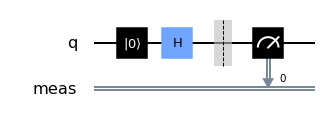

{'0': 4957, '1': 5043}


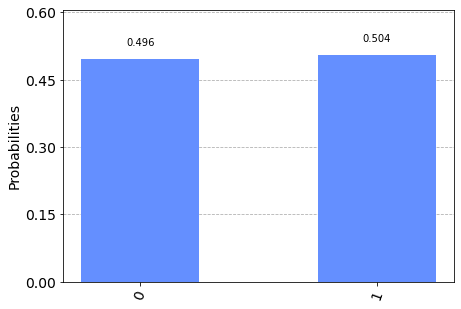

In [8]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.h(0)
my_circuit.measure_all()

display(my_circuit.draw())

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

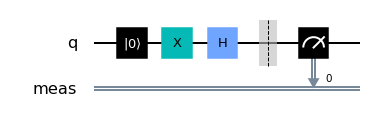

{'0': 4915, '1': 5085}


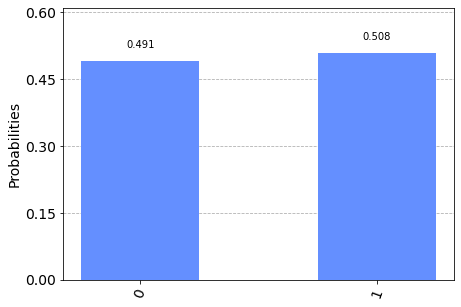

In [9]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.x(0)
my_circuit.h(0)
my_circuit.measure_all()

display(my_circuit.draw())

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

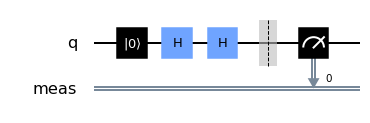

In [10]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.h(0)
my_circuit.h(0)
my_circuit.measure_all()

display(my_circuit.draw())

{'0': 10000}


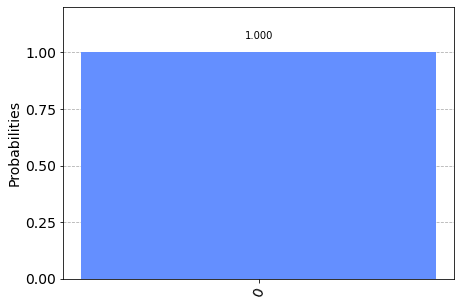

In [11]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

## What happened?

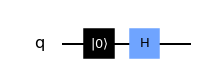

In [12]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.h(0)

my_circuit.draw()

In [13]:
from qiskit.quantum_info import Statevector

quantum_state = Statevector.from_instruction(my_circuit)

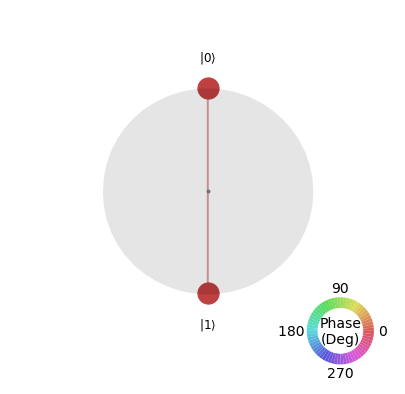

In [14]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(quantum_state, use_degrees=True)

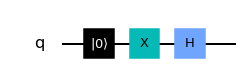

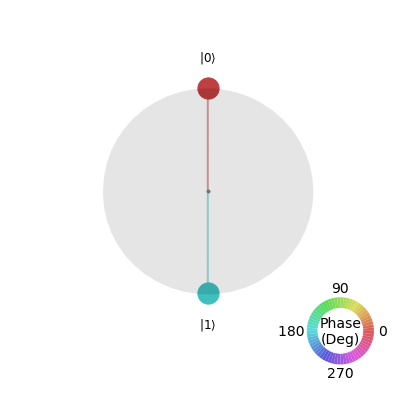

In [15]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.x(0)
my_circuit.h(0)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

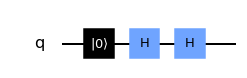

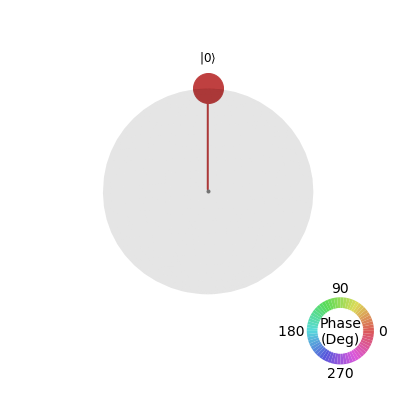

In [16]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.h(0)
my_circuit.h(0)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

<center><img src='./ieeeqw2020-abe-asfaw-talk-dependencies/images/interference.png'></center>

## `Superpositions` with multiple qubits

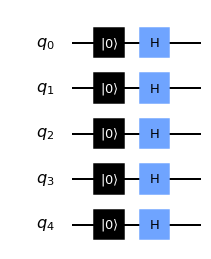

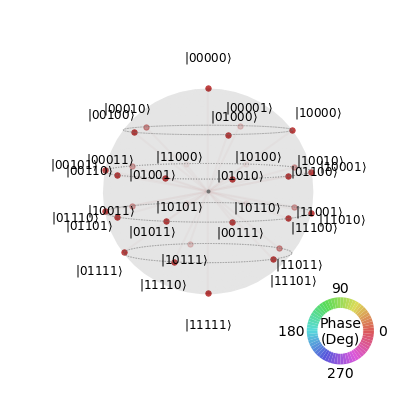

In [17]:
number_of_qubits = 5 # can do even more qubits

my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(my_circuit.qubits)
my_circuit.h(my_circuit.qubits)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

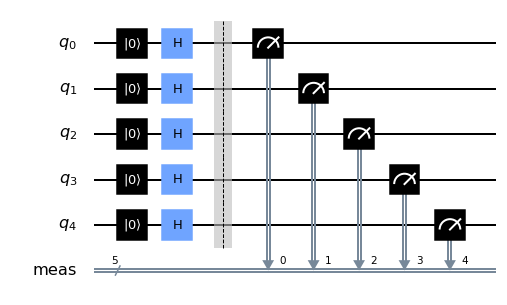

{'00000': 331, '00001': 319, '10000': 312, '10001': 343, '10010': 341, '10011': 311, '10100': 318, '10101': 296, '10110': 339, '10111': 305, '11000': 306, '11001': 321, '11010': 310, '11011': 333, '11100': 300, '11101': 302, '11110': 309, '11111': 300, '00010': 331, '00011': 352, '00100': 279, '00101': 291, '00110': 340, '00111': 298, '01000': 321, '01001': 279, '01010': 295, '01011': 315, '01100': 325, '01101': 300, '01110': 299, '01111': 279}


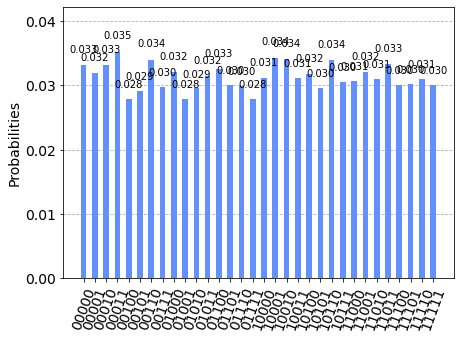

In [18]:
my_circuit.measure_all()

display(my_circuit.draw())

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

### Just because we can create `superpositions` doesn't mean we can quickly try all possible solutions and get a desired result. All outcomes are equally likely during measurement.

# 2. The ability to `entangle` multiple qubits

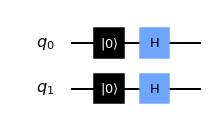

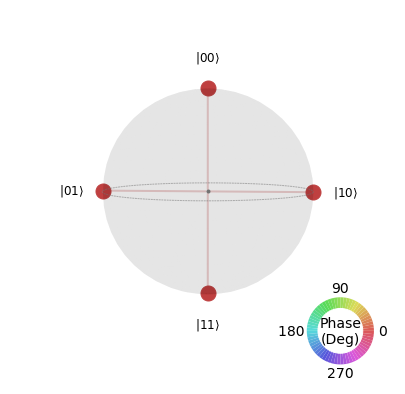

In [19]:
number_of_qubits = 2

my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(my_circuit.qubits)
my_circuit.h(my_circuit.qubits)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

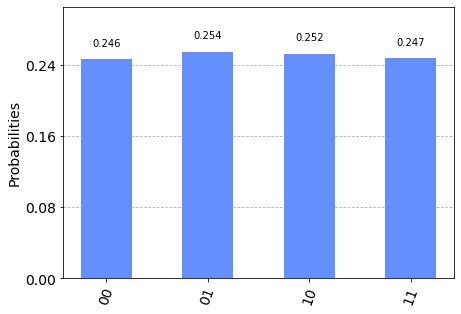

In [20]:
plot_histogram(Statevector.sample_counts(quantum_state, shots=10000))

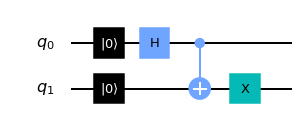

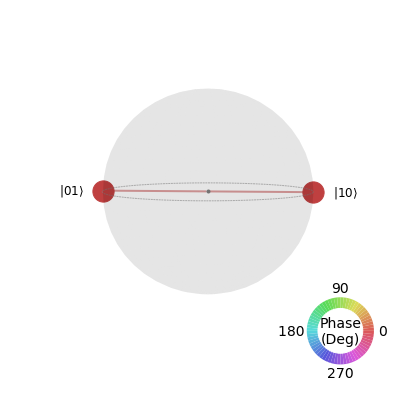

In [21]:
number_of_qubits = 2

my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(my_circuit.qubits)
my_circuit.h(0)
my_circuit.cx(0, 1)
my_circuit.x(1)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

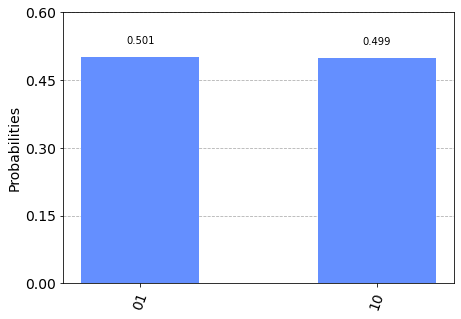

In [22]:
plot_histogram(Statevector.sample_counts(quantum_state, shots=10000))

# `Superposition`, `interference` and `entanglement` in action
Remember the unstructured search problem?

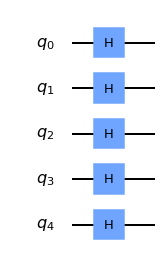

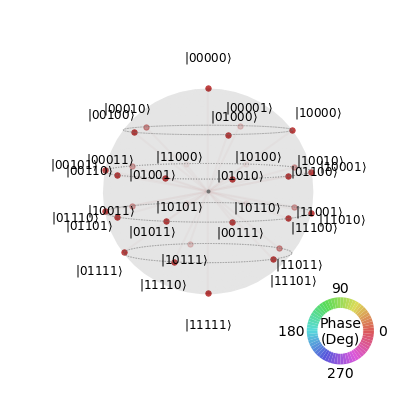

In [23]:
from marked_number_boxes import quantum_box, search_steps

my_box = quantum_box(32)

quantum_program = search_steps(my_box, 0)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

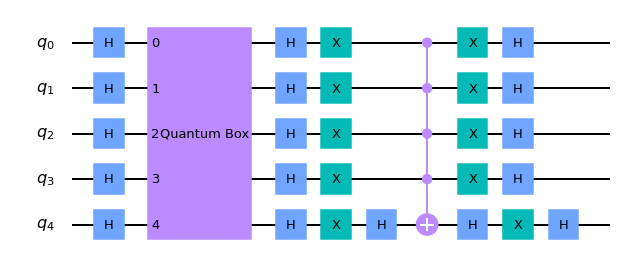

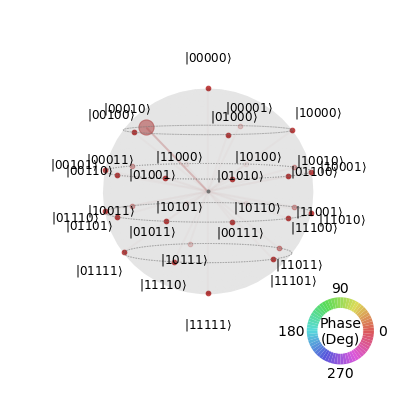

In [24]:
quantum_program = search_steps(my_box, 1)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

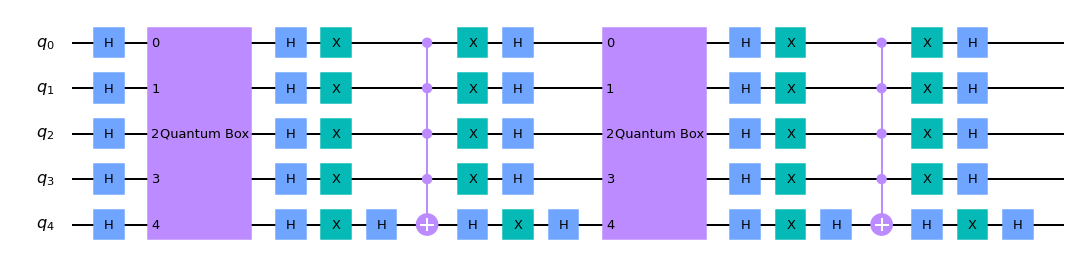

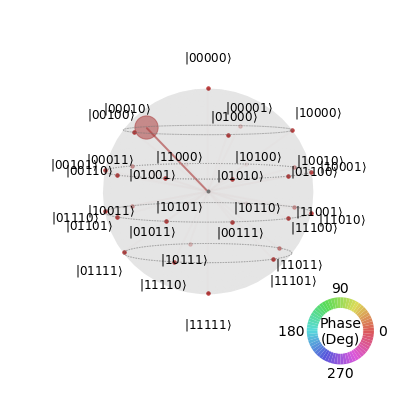

In [25]:
quantum_program = search_steps(my_box, 2)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

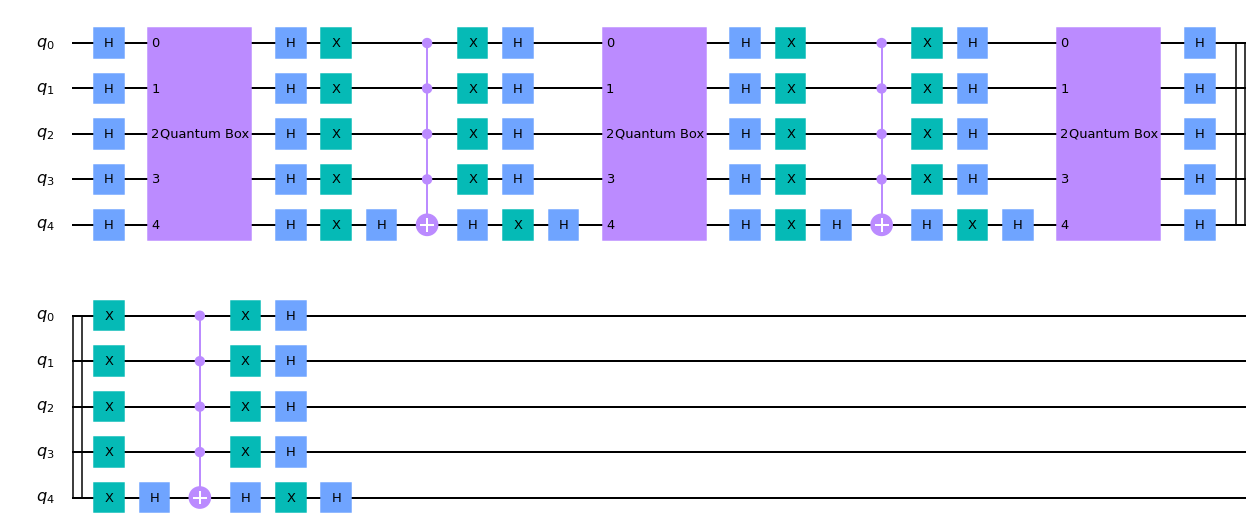

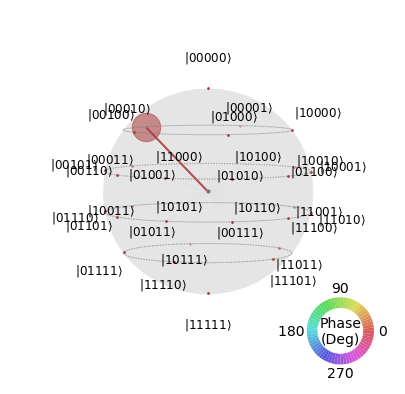

In [26]:
quantum_program = search_steps(my_box, 3)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

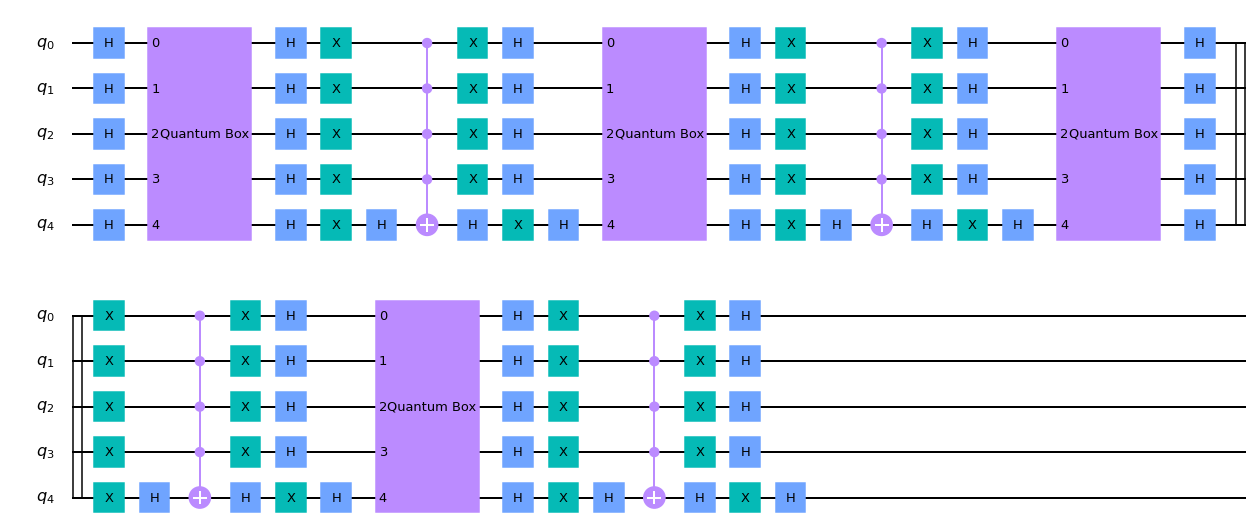

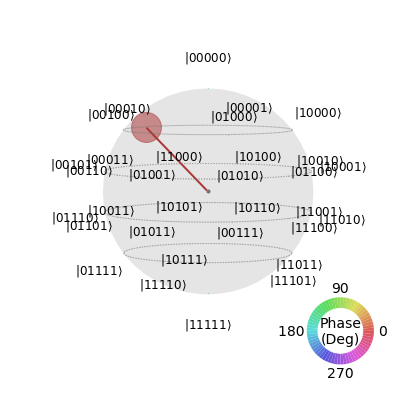

In [27]:
quantum_program = search_steps(my_box, 4)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

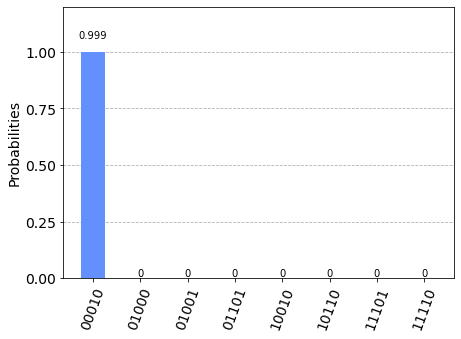

In [28]:
plot_histogram(Statevector.sample_counts(quantum_state, shots=10000))